# **Hall Of Fame Usage**


This notebook will higlights ``halloffame`` API and its main usage.


The notebook is divided into five parts:
* API / Connections
* Scraping processes
* Built-in statistics
* Publishing / Editing
* Furter statistics

First, let's import the package.

In [5]:
from halloffame import HallOfFameAPI
from halloffame.utils import *

# Connect to the API

## Warning !

> To block scraping process and protect user's data, facebook uses dynamic CSS sheets. Thus, when a facebook page is refreshed or loaded, the HTML elements id change over time. To bypass this issue, this package uses a table of known elements, so the bot can be aware when an id changed in the CSS when a page refreshes.


You will need to provide URLs to unique reactions. You can achieved that by creating a group, create multiple posts and associate for each a unique reaction (`LOVE`, `AHAH`, `LIKE` etc.). Then, click on the reaction and copy/paste its URL. Note that you should use the [mobile version of facebook](https://m.facebook.com) to retrive the URL and not the standard version of facebook.

In [6]:
REACTION2HREF = {
    "LIKE":  "/ufi/reaction/profile/browser/?ft_ent_identifier=747380026193010_748370809427265&av=1505898474&ref=group_browse",
    "LOVE":  "/ufi/reaction/profile/browser/?ft_ent_identifier=747380026193010_748370826093930&av=1505898474&ref=group_browse",
    "CARE":  "/ufi/reaction/profile/browser/?ft_ent_identifier=747380026193010_748370842760595&av=1505898474&ref=group_browse",
    "AHAH":  "/ufi/reaction/profile/browser/?ft_ent_identifier=747380026193010_748370846093928&av=1505898474&ref=group_browse",
    "WOW":   "/ufi/reaction/profile/browser/?ft_ent_identifier=747380026193010_748370879427258&av=1505898474&ref=group_browse",
    "SAD":   "/ufi/reaction/profile/browser/?ft_ent_identifier=747380026193010_748370896093923&av=1505898474&ref=group_browse",
    "ANGER": "/ufi/reaction/profile/browser/?ft_ent_identifier=747380026193010_748370906093922&av=1505898474&ref=group_browse"
}

In [7]:
# Path to `geckodriver.exe`
EXECUTABLE_PATH = "driver/geckodriver.exe"


api = HallOfFameAPI(executable_path=EXECUTABLE_PATH, reaction2href=REACTION2HREF)

Connect to the API with your credentials.

In [8]:
EMAIL = "your_email"
PASSWORD = "your_password"

api.login(EMAIL, PASSWORD)

Initialize the reactions from the ``REACTION2HREF`` table.

In [9]:
api.init_reactions()

This ``init`` method will extract the corresponding class for each reaction. You can acess the table with ``class2reaction``attribute.

In [10]:
api.class2reaction

{'sx_4760b1': 'LIKE',
 'sx_b2274b': 'LOVE',
 'sx_16145c': 'CARE',
 'sx_b86f23': 'AHAH',
 'sx_fedc67': 'WOW',
 'sx_dae72a': 'SAD',
 'sx_01fcdf': 'ANGER'}

# Scraping process

This section will list the scraping methods:

* ``get_posts`` (return a list): retrieve all posts from a group,
* ``get_comments`` (return a list): retrieve all comments, replies and their reactions from a post,
* ``get_reactions`` (return a list): retrieve reactions from either a post, comment or reply.

## Extract a comments from a post

In [11]:
GROUP_ID = "your_group_id"
POST_ID = "your_group_id"

comments = api.get_comments(GROUP_ID, POST_ID)
comments

In [14]:
POST_ID = "your_group_id"

reactions = api.get_reactions(POST_ID)
reactions

In [18]:
GROUP_ID = "your_group_id"
TOP_K = 10      # Max posts retrieved
SCROLL_MAX = 5  # Max number of scroll the bot makes in the group page (the lower it is, the less posts are scraped)

posts = api.get_posts(GROUP_ID, topk=TOP_K, scroll_max=SCROLL_MAX)

Retrieving Data: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:18<00:00,  9.32s/it]


You should save the posts, in case your connection is breaks.

In [ ]:
import json

with open(f"posts.json", "w", encoding="utf-8") as file:
    json.dump(posts, file, indent=4)

Load your saved file:

In [ ]:
import json

with open(f"posts.json", "r", encoding="utf-8") as file:
    posts = json.load(file)

# Built-in statistics

You can use the built-in statistics to get an overview of the insights of your group.

In [ ]:
from halloffame import get_top_stats, get_user_stats

user_stats = get_user_stats(posts)
top_stats = get_top_stats(posts)

# Apply a template

To apply statistics in a facebook post, you can use a template: it will fasten your workflow.
Simply write the general structure of your text and wrap the elements that sill change (either stats or fonts) with `<< >>` tags.

For example, to apply a bold font on the text ``this is a text``, simply use ``<<BOLD>>this is a text<<BOLD>>``.
Same for statistics: ``<<TOP1-BEST-POST-REACTION>>``. Note that ``BEST-POST-REACTION`` is a list, so to get the first user add the token ``TOP1`` (and ``TOP2`` for the second etc.).
You can also use both together: ``<<BOLD>><<TOP1-BEST-POST-REACTION>><<BOLD>>``

In [51]:
TEMPLATE = """👑 <<BOLD-SERIF>>Hall Of Fame<<BOLD-ITALIC>> 👑  

Here is a template example for a meme group.

🔥 <<BOLD>>Rank<<BOLD>> 🔥  

🏅 <<BOLD-ITALIC>>Best Memes<<BOLD-ITALIC>>  
🥇 <<TOP1-BEST-POST-REACTION>>  
🥈 <<TOP2-BEST-POST-REACTION>>   
🥉 <<TOP3-BEST-POST-REACTION>>  

𝑒𝑡𝑐...

🔥 <<BOLD>>Honors<<BOLD>> 🔥

📈 <<BOLD-ITALIC>>Most Active<<BOLD-ITALIC>>      
🥇 <<TOP1-POST-COUNT>>  
🥈 <<TOP2-POST-COUNT>>  
🥉 <<TOP3-POST-COUNT>>   

𝑒𝑡𝑐...

🔥 <<BOLD>>Reactions<<BOLD>> 🔥  

😆 <<BOLD-ITALIC>>Funniest<<BOLD-ITALIC>>  
🥇 <<TOP1-REACTION-AHAH>>  
🥈 <<TOP2-REACTION-AHAH>>  
🥉 <<TOP3-REACTION-AHAH>>  

𝑒𝑡𝑐...

🕙 Message generated at <<DATE-NOW>>"""

In [ ]:
from halloffame import apply_template

message = apply_template(template, top_stats)
message

# Publish / Edit a post

In [ ]:
post_id = api.publish_post(GROUP_ID, message)
post_id

In [ ]:
api.edit_post(GROUP_ID, post_id, "This message was updated")

# Further statistics

This section present simple graphs that you can create from the list of posts previoulsy retrieved. 

## Time series

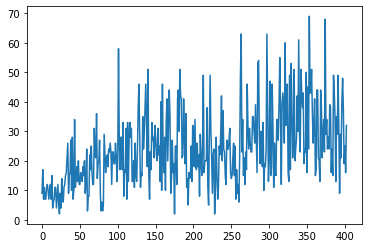

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime

posts_sorted = sorted(posts, key=lambda post: datetime.fromisoformat(post["date"]).timestamp(), reverse=False)
timeseries_reactions = [len(post["reactions"]) for post in posts_sorted]

plt.plot(timeseries_reactions)

In [9]:
posts_sorted = sorted(posts, key=lambda post: datetime.fromisoformat(post["date"]).timestamp(), reverse=False)
dates = [datetime.fromisoformat(post["date"]) for post in posts_sorted]
timeseries_reactions = [len(post["reactions"]) for post in posts_sorted]
timeseries_comments = [len(post["comments"]) for post in posts_sorted]

## Pandas dataframe

In [11]:
import pandas as pd

df = pd.DataFrame({"reaction": timeseries_reactions, "comment": timeseries_comments}, index=pd.to_datetime(dates))

In [12]:
df.tail(10)

,reaction,comment
2020-12-01 13:32:00,9,1
2020-12-02 12:54:00,29,0
2020-12-02 13:29:00,21,2
2020-12-02 19:35:00,40,5
2020-12-02 19:49:00,48,2
2020-12-02 20:56:00,37,0
2020-12-03 10:42:00,19,4
2020-12-03 21:45:00,25,0
2020-12-04 18:59:00,16,2
2020-12-05 17:34:00,32,1


## Weekly mean

In [19]:
logic = {
    'reaction'  : 'mean',
     'comment'  : 'mean'
}

offset = pd.offsets.timedelta(days=6)

df_week = df.resample('W', loffset=offset).apply(logic)
# Interpolate missing data
df_week = df_week.interpolate(method='quadratic', axis=0).ffill().bfill()

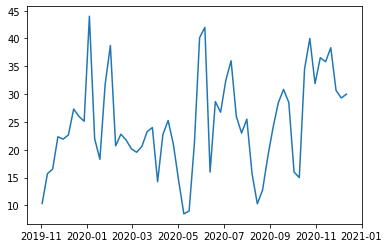

In [20]:
plt.plot(df_week["reaction"])

## Sliding average

In [58]:
import numpy as np

N = 60  # Mean over N points
mean = np.convolve(timeseries_reactions, np.ones(N)/N, mode='valid')

In [59]:
len(timeseries_reactions[N-1:]), len(mean), len(timeseries_reactions[::30])

(344, 344, 14)

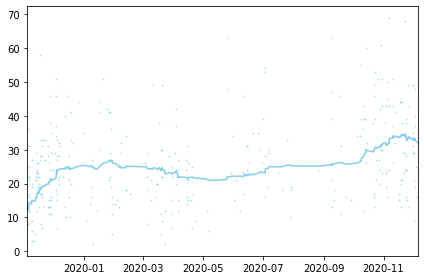

In [60]:
fig, ax = plt.subplots()

plt.plot(dates[N-1:], mean, color="skyblue", alpha=1)
plt.scatter(dates[N-1:], timeseries_reactions[N-1:], color="skyblue", alpha=0.5, s=1)
ax.set_xlim(dates[N-1], dates[-1])

plt.tight_layout()